In [106]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
import resource
import numpy as np
from skimage import img_as_bool, io, color

soft, hard = resource.getrlimit(resource.RLIMIT_NOFILE)
resource.setrlimit(resource.RLIMIT_NOFILE, (hard, hard))

thickTrainDir = "data/train/thick/"
thinTrainDir = "data/train/thin/"
thickValDir = "data/validation/thick/"
thinValDir = "data/validation/thin/"

X_train = []
y_train = []
X_val = []
y_val = []

#thickImgs = os.listdir(thickTrainDir)
#for thickImg in thickImgs:
#    imgPath = thickTrainDir + thickImg
#    if not os.path.isdir(imgPath) :
#        x = load_img(imgPath)
#        x = img_as_bool(color.rgb2gray(io.imread(imgPath)))
#        x_train.append(x)

#x_train = np.array(x_train)

# se agregan las imágenes y sus etiquetas a las listas en entrenamiento y validacion
def appendImgs(imglist, labels, directory):
    imgs = os.listdir(directory)
    for img in imgs:
        imgPath = directory + img
        if not os.path.isdir(imgPath) :
            x = load_img(imgPath)
            x = img_as_bool(color.rgb2gray(io.imread(imgPath)))
            imglist.append(x)
            if 'thick' in imgPath:
                labels.append(1)
            elif 'thin' in imgPath:
                labels.append(0)

appendImgs(X_train, y_train, thickTrainDir)
appendImgs(X_train, y_train, thinTrainDir)

appendImgs(X_val, y_val, thickValDir)
appendImgs(X_val, y_val, thinValDir)

X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

#X_train.shape

print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)

print('X_val.shape = ', X_val.shape)
print('y_val.shape = ', y_val.shape)


#train_thick =   

# create generator
#datagen = ImageDataGenerator()

X_train.shape =  (2000, 256, 256)
y_train.shape =  (2000,)
X_val.shape =  (400, 256, 256)
y_val.shape =  (400,)


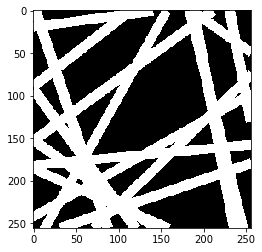

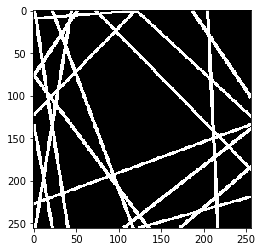

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline
import random

random_image_thick = random.randint(0, X_train.shape[0]/2-1)
random_image_thin = random.randint(X_train.shape[0]/2,X_train.shape[0])

plt.imshow(X_train[random_image_thick],cmap='gray')
plt.show()
plt.imshow(X_train[random_image_thin],cmap='gray')

In [4]:
#train_it = datagen.flow_from_directory('data/train/', class_mode='binary')
#val_it = datagen.flow_from_directory('data/validation/', class_mode='binary')

#train_it

#import matplotlib.pyplot as plt

#plt.imshow(train_it[0], cmap='gray', vmin=0, vmax=255)
#plt.show()


#batchX, batchy = train_it.next()
#print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

NameError: name 'train_it' is not defined

In [97]:
import keras
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import tensorflow as tf

NUM_CLASSES = 2
NUM_FILTERS = 128

#bs = 32
#epochs = 10
#lr = 0.001

#model = Sequential()
#model.add(Flatten(input_shape=X_train[0].shape))
#model.add(Dense(128, activation='relu'))
#model.add(Dense(2, activation='softmax'))
#model.compile(optimizer=SGD(lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.summary()

X_train = X_train.reshape(X_train.shape[0], 256, 256, 1)
X_val = X_val.reshape(X_val.shape[0], 256, 256, 1)
input_shape = (256, 256, 1)

model = Sequential()
model.add(Conv2D(NUM_FILTERS, kernel_size=(3,3), activation=tf.nn.relu, input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(8, 8)))
model.add(Dropout(0.25))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
#model.add(Dense(64, activation=tf.nn.relu))
#model.add(Dense(32, activation=tf.nn.relu))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES,activation=tf.nn.softmax))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
metrics=['accuracy'])

model.summary()


##model building
#model = Sequential()
#convolutional layer with rectified linear unit activation
#model.add(Conv2D(32, kernel_size=(3, 3),
                 #activation='relu',
                 #input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
#model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
#model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
#model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
#model.add(Flatten())
#fully connected to get all relevant data
#model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
#model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
#model.add(Dense(num_category, activation='softmax'))

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 254, 254, 128)     1280      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 252, 252, 64)      73792     
_________________________________________________________________
dropout_19 (Dropout)         (None, 252, 252, 64)      0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 4064256)           0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)               520224896 
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 2)               

In [98]:
BATCH_SIZE = 128
EPOCHS = 20
# log = model.fit(X_train, y_train, batch_size=bs, epochs=epochs, validation_data=[X_val, y_val])
#log = model.fit(x=X_train,y=y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_val, y_val))
log = model.fit(x=X_train,y=y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_val, y_val), verbose=1)

Train on 2000 samples, validate on 400 samples
Epoch 1/20
2000/2000 [==============================] - 189s 95ms/step - loss: 5.5292 - accuracy: 0.7065 - val_loss: 0.3492 - val_accuracy: 0.9775
Epoch 2/20
2000/2000 [==============================] - 187s 94ms/step - loss: 0.3381 - accuracy: 0.9865 - val_loss: 0.2679 - val_accuracy: 1.0000
Epoch 3/20
2000/2000 [==============================] - 187s 93ms/step - loss: 0.1848 - accuracy: 0.9985 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 4/20
2000/2000 [==============================] - 187s 93ms/step - loss: 0.1599 - accuracy: 0.9985 - val_loss: 1.9356e-04 - val_accuracy: 1.0000
Epoch 5/20
2000/2000 [==============================] - 187s 93ms/step - loss: 0.1675 - accuracy: 0.9985 - val_loss: 2.8374e-04 - val_accuracy: 1.0000
Epoch 6/20
2000/2000 [==============================] - 187s 93ms/step - loss: 0.1569 - accuracy: 1.0000 - val_loss: 4.9388e-04 - val_accuracy: 1.0000
Epoch 7/20
2000/2000 [==============================] - 187

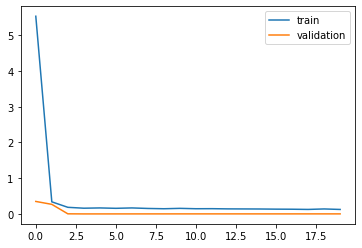

In [99]:
plt.plot(log.history['loss'], label='train')
plt.plot(log.history['val_loss'], label='validation')
plt.legend()

In [95]:
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0
Test accuracy: 1.0


In [148]:
img_width,img_height = 256,256
#img = load_img('data/validation/thick/0001.png',False,target_size=(img_width,img_height))
img = img_as_bool(color.rgb2gray(io.imread('data/test/0001.png')))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
preds = model.predict_classes(x)
#prob = model.predict_proba(x)
#print(preds, prob)
preds

array([0])